***Import libraires and data, set up stuff***

In [1]:
import scanpy as sc
import pandas as pd
import scvelo as scv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import anndata as ad

In [2]:
sample = sc.read('../data/notebooks_data/sample_123.filt.norm.clst.h5ad')

Only considering the two last: ['.clst', '.h5ad'].
Only considering the two last: ['.clst', '.h5ad'].


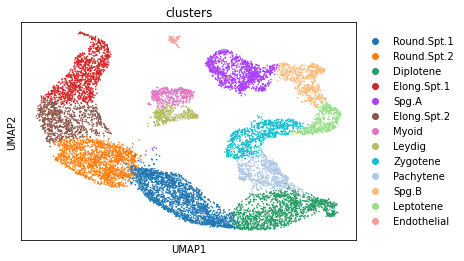

In [3]:
sc.pl.umap(sample, color=['clusters'])

In [4]:
cellsToKeep = [ i not in ['Leydig','Endothelial','Myoid'] for i in sample.obs['clusters'] ]
sample = sample[ cellsToKeep ].copy()

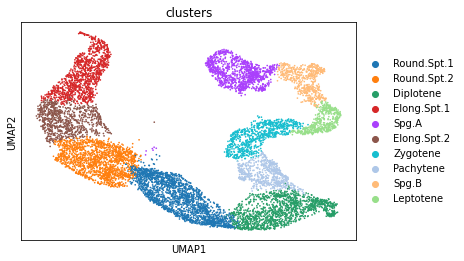

In [5]:
sc.pl.umap(sample, color=['clusters'])

In [6]:
import palantir
palantir.core.random.seed( a=12345 ) #define random seed

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [10]:
palantir_data = pd.DataFrame(sample.layers['log_counts'],
                             index=sample.obs_names,
                             columns=sample.var_names)

In [11]:
sc.preprocessing.pca(sample, random_state=12345, n_comps=15)
pca_projections = pd.DataFrame( sample.obsm['X_pca'].copy(),
                                index=sample.obs_names )     

In [12]:
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=10) #diffusion maps
ms_data = palantir.utils.determine_multiscale_space(dm_res) #multiscale space
start_cell = str(sample[sample.obs['clusters'] == 'Spg.A'].obs_names[1]) #root
pr_res = palantir.core.run_palantir( ms_data, early_cell=start_cell, num_waypoints=1000) #fate detection

Determing nearest neighbor graph...
Sampling and flocking waypoints...
Time for determining waypoints: 0.025648872057596844 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


Time for shortest paths: 0.20250662565231323 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [19]:
ms_data.index = sample.obs_names
projection = pd.DataFrame(sample.obsm['X_umap'][:,0:2],
                          index=sample.obs_names,
                          columns=['x','y'])
ms_data.umap = projection

In [14]:
end_states = np.asarray(pr_res.branch_probs.columns)

In [16]:
sample.obs['palantir_pseudotime'] = pr_res.pseudotime

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


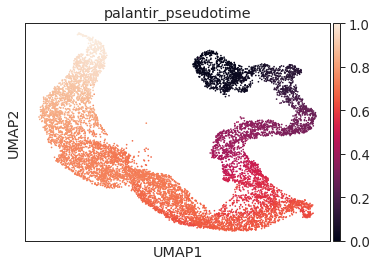

In [17]:
sc.pl.umap( sample, color=['palantir_pseudotime'], 
           legend_loc='on data', 
           legend_fontsize=16,
           ncols=2 )

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


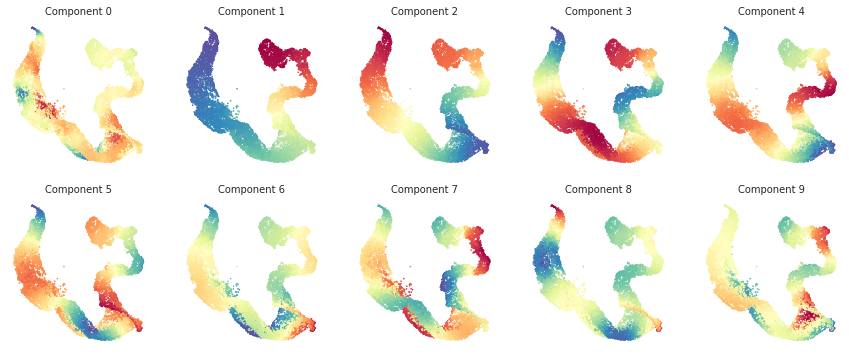

In [21]:
palantir.plot.plot_diffusion_components(ms_data.umap, dm_res)

In [25]:
sample[sample.obs['clusters']=='Elong.Spt.1'][0].obs_names

Index(['AAACGGGCATGGATGG-0'], dtype='object')

In [29]:
pr_res.branch_probs.columns

Index(['CTACGTCTCGCCTGTT-2'], dtype='object')

(<Figure size 288x288 with 1 Axes>, <AxesSubplot:>)

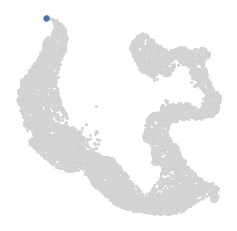

In [30]:
palantir.plot.highlight_cells_on_tsne(ms_data.umap, 'CTACGTCTCGCCTGTT-2')